In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# --- Step 1: Data Loading ---
df = pd.read_csv('hr.csv')

In [3]:
# Display the first few rows and get info to understand the initial state
print("--- Initial Data Head ---")
df.head()

--- Initial Data Head ---


,ï»¿id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,jbrandt771,Justin,Brandt,6/11/2004,Male,Black or African American,Business Development,Business Analyst,Headquarters,4/28/2025,2025-06-26 11:10:00 UTC,New Jennifer,California
1,emurphy366,Erin,Murphy,4/13/2001,Male,Native Hawaiian or Other Pacific Islander,Accounting,Financial Analyst,Headquarters,6/22/2025,NaN,Millerstad,California
2,kmckinney761,Kristina,Mckinney,5/24/2002,Female,Native Hawaiian or Other Pacific Islander,Sales,Sales Representative,Remote,9/20/2024,NaN,Brittanyhaven,Washington
3,csmith433,Claudia,Smith,7/24/1993,Female,White,Business Development,Business Analyst,Remote,7/30/2014,NaN,Lake Chasetown,Washington
4,msmith274,Matthew,Smith,5/14/1969,Male,White,Business Development,Business Analyst,Remote,11/20/1996,NaN,Francisfort,Colorado


In [4]:
print("\n--- Initial Data Info ---")
df.info()


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22214 entries, 0 to 22213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ï»¿id           22214 non-null  object
 1   first_name      22214 non-null  object
 2   last_name       22214 non-null  object
 3   birthdate       22214 non-null  object
 4   gender          22214 non-null  object
 5   race            22214 non-null  object
 6   department      22214 non-null  object
 7   jobtitle        22214 non-null  object
 8   location        22214 non-null  object
 9   hire_date       22214 non-null  object
 10  termdate        3349 non-null   object
 11  location_city   22214 non-null  object
 12  location_state  22214 non-null  object
dtypes: object(13)
memory usage: 2.2+ MB


In [5]:
# --- Step 2: Data Cleaning and Transformation---
# Rename the problematic 'ï»¿id' column
df.rename(columns={'ï»¿id': 'id'}, inplace=True)

In [6]:
# Standardize and convert date columns
# The errors='coerce' argument will turn any problematic dates into 'NaT' (Not a Time)
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')

In [7]:
# Clean 'termdate' by extracting only the date part and converting it
df['termdate'] = df['termdate'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df['termdate'] = pd.to_datetime(df['termdate'], errors='coerce')

# Add the 'age' column (Feature Engineering)
current_date = datetime.now()
df['age'] = (current_date - df['birthdate']).dt.days // 365

In [8]:
# Display the cleaned data's info to verify changes
print("\n--- Cleaned Data Info ---")
df.info()


--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22214 entries, 0 to 22213
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              22214 non-null  object        
 1   first_name      22214 non-null  object        
 2   last_name       22214 non-null  object        
 3   birthdate       22214 non-null  datetime64[ns]
 4   gender          22214 non-null  object        
 5   race            22214 non-null  object        
 6   department      22214 non-null  object        
 7   jobtitle        22214 non-null  object        
 8   location        22214 non-null  object        
 9   hire_date       22214 non-null  datetime64[ns]
 10  termdate        3349 non-null   datetime64[ns]
 11  location_city   22214 non-null  object        
 12  location_state  22214 non-null  object        
 13  age             22214 non-null  int64         
dtypes: datetime64[ns](3), int64

In [9]:
print("\n--- Cleaned Data Head ---")
print(df.head())


--- Cleaned Data Head ---
             id first_name last_name  birthdate  gender  \
0    jbrandt771     Justin    Brandt 2004-06-11    Male   
1    emurphy366       Erin    Murphy 2001-04-13    Male   
2  kmckinney761   Kristina  Mckinney 2002-05-24  Female   
3     csmith433    Claudia     Smith 1993-07-24  Female   
4     msmith274    Matthew     Smith 1969-05-14    Male   

                                        race            department  \
0                  Black or African American  Business Development   
1  Native Hawaiian or Other Pacific Islander            Accounting   
2  Native Hawaiian or Other Pacific Islander                 Sales   
3                                      White  Business Development   
4                                      White  Business Development   

               jobtitle      location  hire_date   termdate   location_city  \
0      Business Analyst  Headquarters 2025-04-28 2025-06-26    New Jennifer   
1     Financial Analyst  Headquarters 2

In [10]:
# --- Step 3: Exploratory Data Analysis (EDA) - Answering Business Questions ---
# Set up plot styles for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


--- Gender Breakdown ---
gender
Male              10706
Female            10652
Non-Conforming      856
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4304\2891497404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')


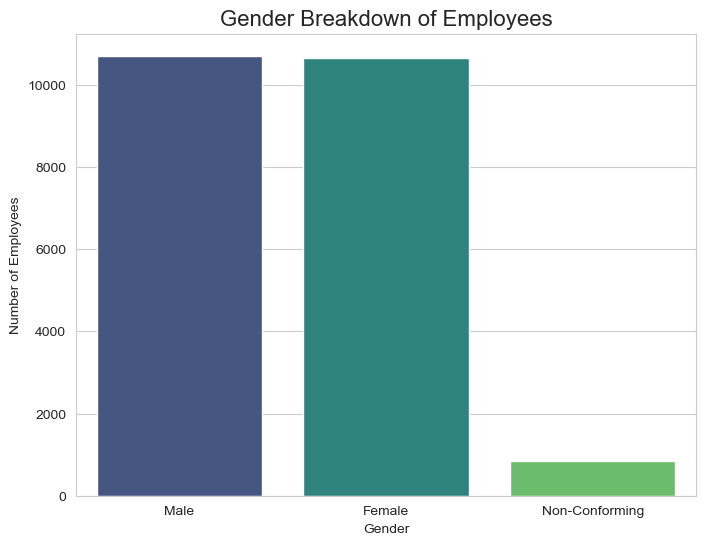

In [11]:
# Question 1: What is the gender breakdown of employees?
print("\n--- Gender Breakdown ---")
gender_counts = df['gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('Gender Breakdown of Employees', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()


--- Race/Ethnicity Breakdown ---
race
White                                        11034
Black or African American                     4417
Asian                                         2267
Hispanic or Latino                            2227
American Indian or Alaska Native              1086
Native Hawaiian or Other Pacific Islander      710
Two or More Races                              473
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4304\323848873.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='race', order=race_counts.index, palette='plasma')


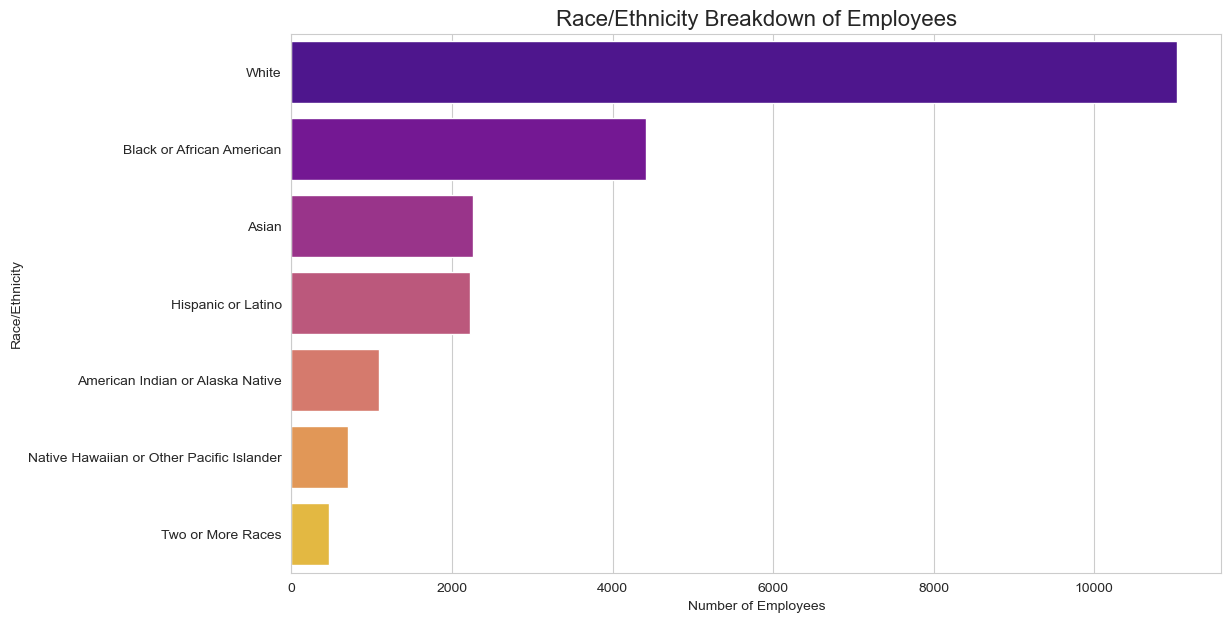

In [12]:
# Question 2: What is the race/ethnicity breakdown?
print("\n--- Race/Ethnicity Breakdown ---")
race_counts = df['race'].value_counts()
print(race_counts)

plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='race', order=race_counts.index, palette='plasma')
plt.title('Race/Ethnicity Breakdown of Employees', fontsize=16)
plt.xlabel('Number of Employees')
plt.ylabel('Race/Ethnicity')
plt.show()



--- Age Distribution ---
count    22214.000000
mean        40.096696
std         11.857739
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         61.000000
Name: age, dtype: float64


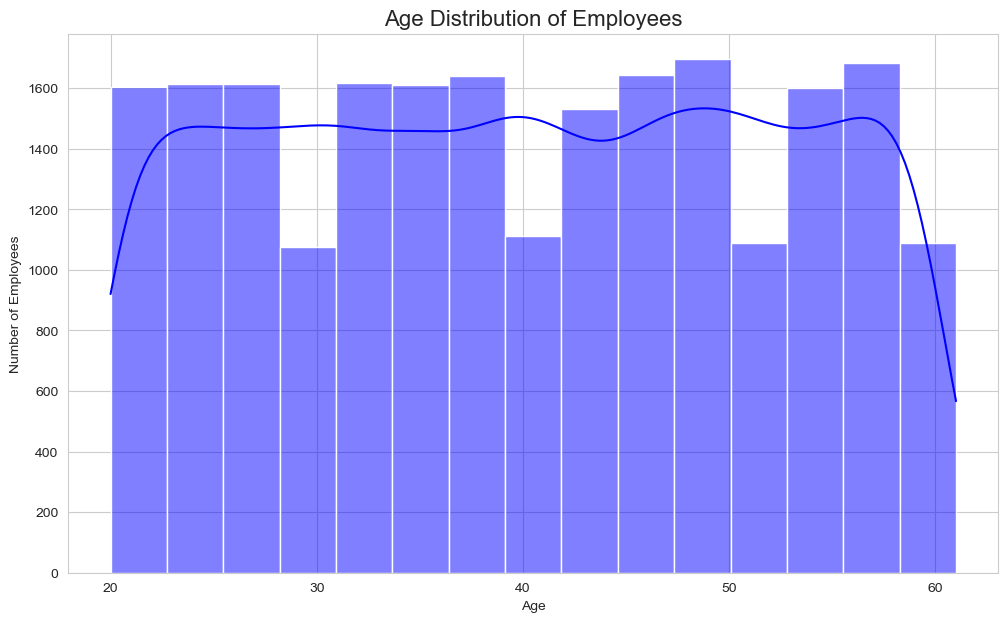

In [13]:
# Question 3: What is the age distribution?
print("\n--- Age Distribution ---")
print(df['age'].describe())

plt.figure(figsize=(12, 7))
sns.histplot(df['age'], bins=15, kde=True, color='blue')
plt.title('Age Distribution of Employees', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()



--- Location Breakdown (HQ vs. Remote) ---
location
Headquarters    13317
Remote           8897
Name: count, dtype: int64


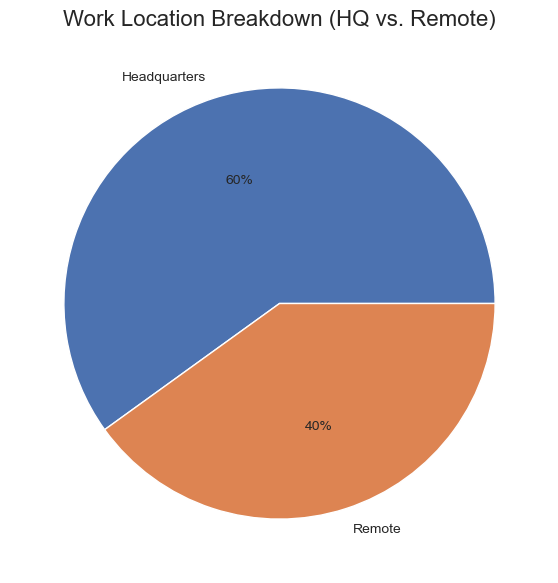

In [16]:
# Question 4: How many employees work at headquarters vs. remote?
print("\n--- Location Breakdown (HQ vs. Remote) ---")
location_counts = df['location'].value_counts()
print(location_counts)

plt.figure(figsize=(7, 7))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.0f%%', colors=['#4C72B0', '#DD8452'])
plt.title('Work Location Breakdown (HQ vs. Remote)', fontsize=16)
plt.show()

In [17]:
# Question 5: What is the average length of employment for terminated employees?
terminated_df = df[df['termdate'].notna()]
terminated_df['tenure'] = (terminated_df['termdate'] - terminated_df['hire_date']).dt.days / 365
avg_tenure = terminated_df['tenure'].mean()
print(f"\n--- Average Tenure of Terminated Employees ---")
print(f"The average length of employment for terminated employees is: {avg_tenure:.2f} years")


--- Average Tenure of Terminated Employees ---
The average length of employment for terminated employees is: 6.84 years


C:\Users\Admin\AppData\Local\Temp\ipykernel_4304\2630401496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terminated_df['tenure'] = (terminated_df['termdate'] - terminated_df['hire_date']).dt.days / 365


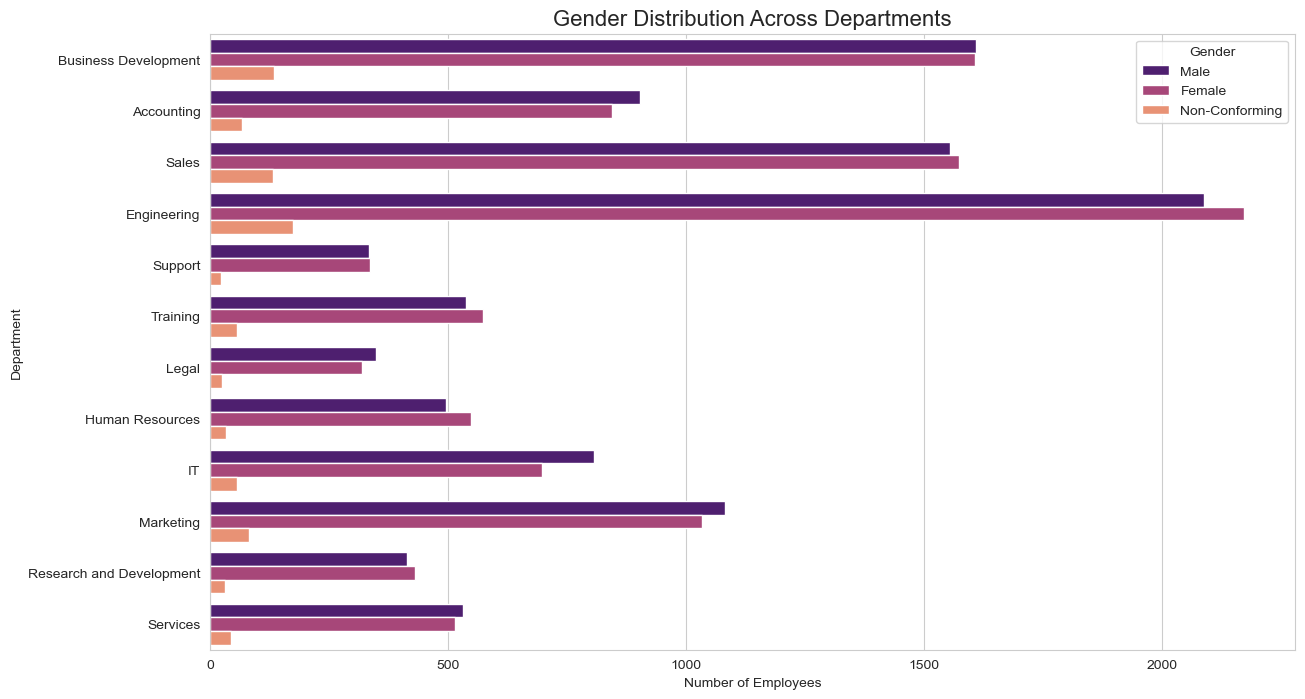

In [18]:
# Question 6: How does the gender distribution vary across departments?
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='department', hue='gender', palette='magma')
plt.title('Gender Distribution Across Departments', fontsize=16)
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.legend(title='Gender')
plt.show()



--- Top 10 Job Titles ---
jobtitle
Strategy Manager        1678
Business Analyst        1673
Sales Representative    1630
Account Manager         1630
DevOps Engineer         1531
Data Scientist          1469
Software Engineer       1435
Training Specialist     1167
Content Creator         1106
Marketing Specialist    1091
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4304\2991878134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='cividis')


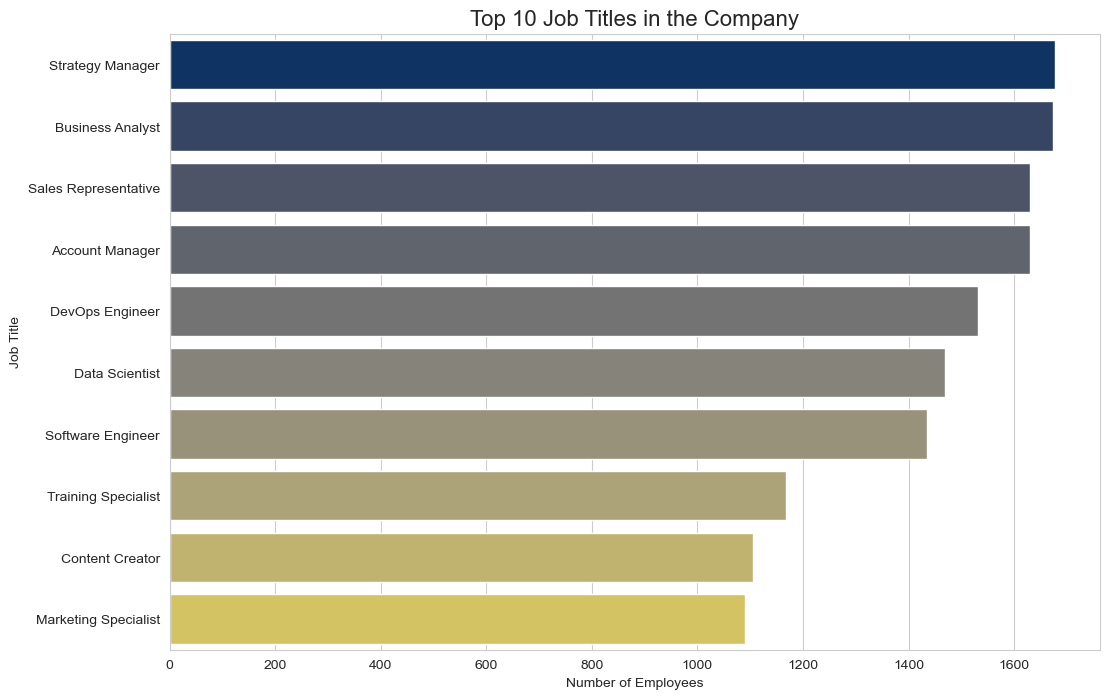

In [19]:
# Question 7: What is the distribution of job titles?
print("\n--- Top 10 Job Titles ---")
top_job_titles = df['jobtitle'].value_counts().nlargest(10)
print(top_job_titles)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='cividis')
plt.title('Top 10 Job Titles in the Company', fontsize=16)
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.show()

In [23]:
# Question 8: Which department has the highest turnover rate? (CRITICAL INSIGHT)
# Calculate total employees and terminated employees per department
dept_counts = df['department'].value_counts()
terminated_by_dept = df[df['termdate'].notna()]['department'].value_counts()

# Calculate turnover rate
turnover_rate = (terminated_by_dept / dept_counts).sort_values(ascending=False)
turnover_rate_df = turnover_rate.reset_index()
turnover_rate_df.columns = ['department', 'turnover_rate']
print("\n--- Turnover Rate by Department ---")
print(turnover_rate_df)


--- Turnover Rate by Department ---
                  department  turnover_rate
0                   Services       0.165289
1            Human Resources       0.160482
2                 Accounting       0.158590
3                   Training       0.157669
4                    Support       0.154848
5                      Sales       0.152147
6                Engineering       0.151297
7   Research and Development       0.149543
8                      Legal       0.148629
9       Business Development       0.146822
10                 Marketing       0.143832
11                        IT       0.133248


C:\Users\Admin\AppData\Local\Temp\ipykernel_4304\4218251407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=turnover_rate_df, x='turnover_rate', y='department', palette='rocket')


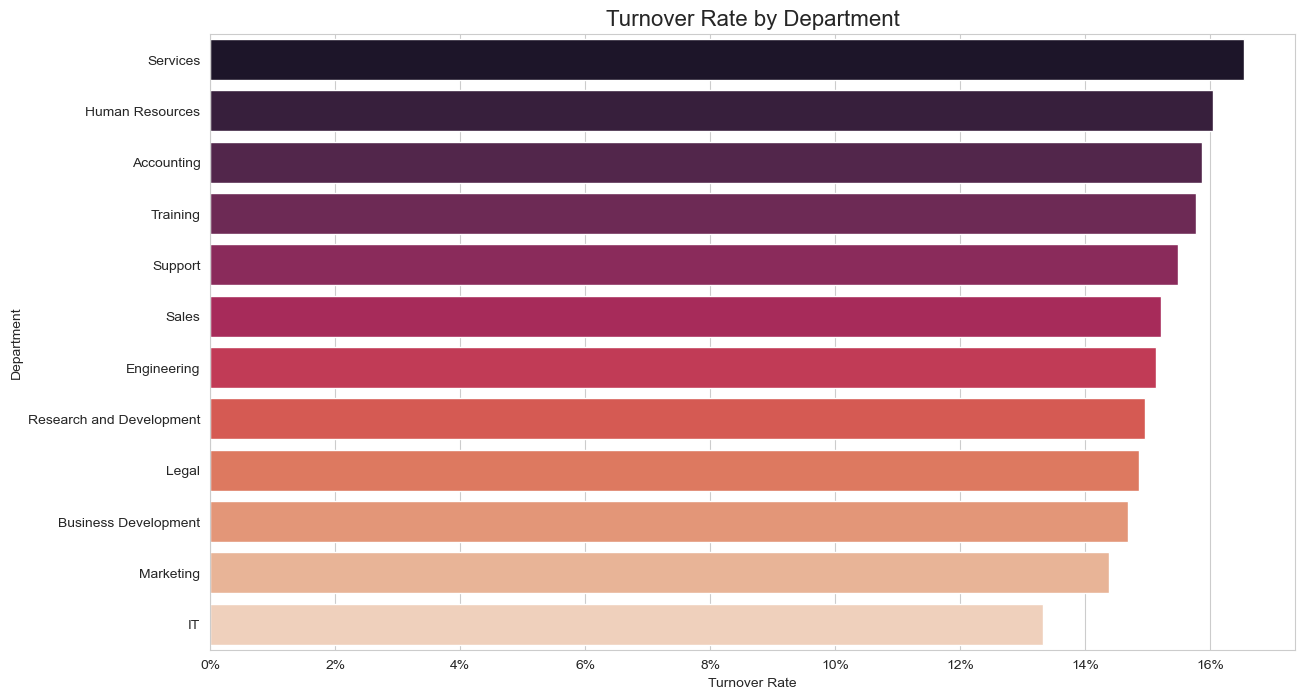

In [24]:
plt.figure(figsize=(14, 8))
sns.barplot(data=turnover_rate_df, x='turnover_rate', y='department', palette='rocket')
plt.title('Turnover Rate by Department', fontsize=16)
plt.xlabel('Turnover Rate')
plt.ylabel('Department')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))) # Format x-axis as percentage
plt.show()

In [27]:
# Question 9: What is the employee distribution across states?
print("\n--- Top 10 States by Employee Count ---")
state_counts = df['location_state'].value_counts().nlargest(10)
print(state_counts)


--- Top 10 States by Employee Count ---
location_state
California       13317
Washington        1325
Illinois          1318
Massachusetts     1269
Colorado          1252
New York          1251
Texas             1241
Florida           1241
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_4304\2867571541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette='viridis')


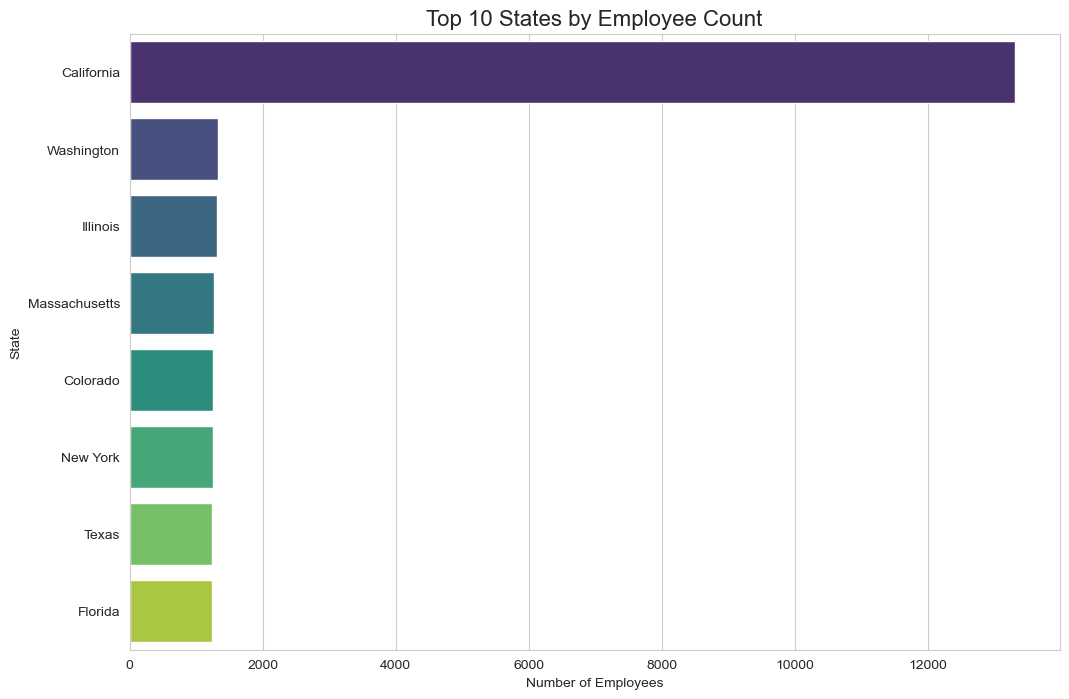

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='viridis')
plt.title('Top 10 States by Employee Count', fontsize=16)
plt.xlabel('Number of Employees')
plt.ylabel('State')
plt.show()

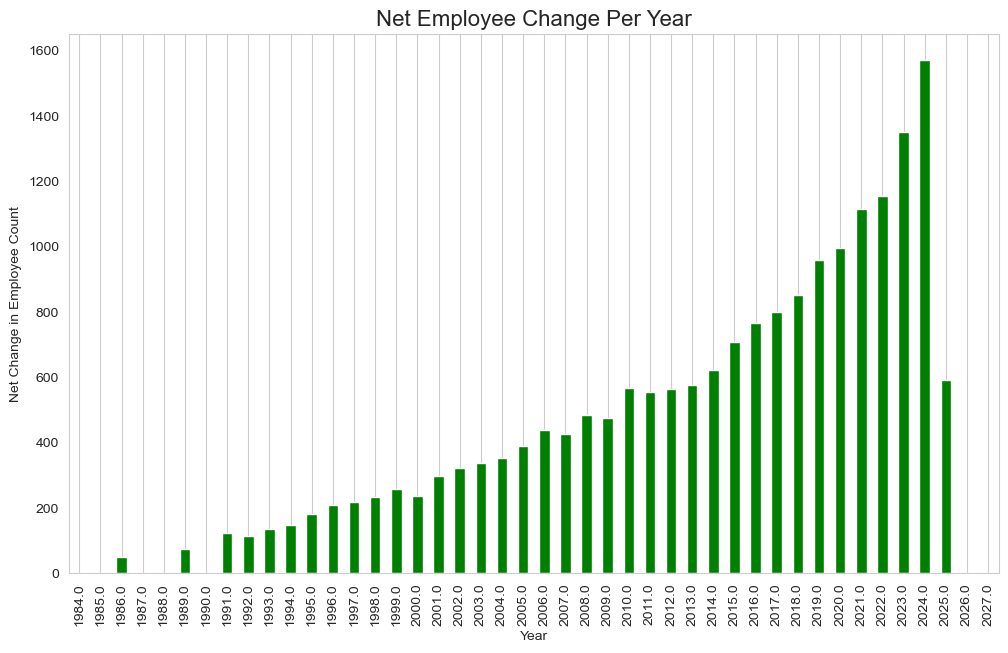

In [28]:
# Question 10: How has the company's employee count changed over time?
hires_by_year = df.groupby(df['hire_date'].dt.year)['id'].count()
terminations_by_year = df.groupby(df['termdate'].dt.year)['id'].count()

net_change = hires_by_year.subtract(terminations_by_year.fillna(0))

plt.figure(figsize=(12, 7))
net_change.plot(kind='bar', color=net_change.apply(lambda x: 'g' if x > 0 else 'r'))
plt.title('Net Employee Change Per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Net Change in Employee Count')
plt.grid(axis='y')
plt.show()